### This code ensures that we can load our own external modules

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

### Loading all of the external modules that we have built 

In [2]:
from src.modules.dataset import Dataset
from src.modules.plotter import Plotter
from src.modules.polynomial_regression import PolynomialRegression

### Loading The data using our own custom data loader and parser

The data was shuffeled to ensure the model won't be biased towards a certain order. And to accurately split the data into two subsets.

In [3]:
dataset = Dataset(
    os.path.join(os.getcwd(), '../datasets/regression_part_2.csv'),
    ['x'],
    'y',
    shuffle=True
)

dataset.normalize()

In [4]:
print(f'Dataset Size: {len(dataset.inputs)}')

Dataset Size: 240


# Question1: please split your dataset into training and testing.
We have used 30% of the data to be our testing sample and the rest 70% for training 

In [5]:
training_inputs, testing_inputs, training_outputs, testing_outputs = dataset.split_data(testing_size=0.3)

### 1.1 - How many features do you’ve? Cite them.

We have only one feature which is:

In [6]:
print(dataset.input_labels)

['x']


### 1.2 - How many training/testing examples do you’ve?

In [7]:
print(f'Training Data Size: {len(training_inputs)}', f'Testing Sample Size: {len(testing_inputs)}')

Training Data Size: 168 Testing Sample Size: 72


### 1.3 - Check if there is any missing data.

We have created a helper on our dataset module that returns False if one of the feature found null. And True if no null value exists.

In [8]:
print(dataset.check_null_inputs())

True


### 1.4 - Give the mean/median/min/max for each feature.

In [9]:
print(dataset.describe(columns=['x']))

Name        Max       Min         Mean    Median
------  -------  --------  -----------  --------
x       1.72485  -1.72485  2.22045e-17         0


## Use scatter plot to represent your training dataset

We have created our own plotting module that's going to make things easier for us down the line to plot things from the model directly

The Plotter Module takes in the model and all of the samples as parameters

In [10]:
plotter = Plotter(
    None,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy()
)

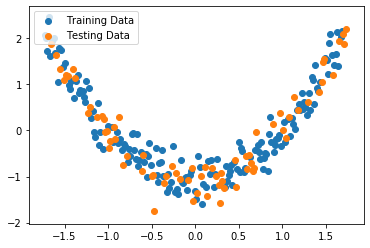

In [11]:
plotter.scatter_data(dataset.min(column='x'), dataset.max(column='x'), no_model=True)

## What’s the nature of this data? Is it supervised or semi-supervised learning? Justify your response.

It is supervised, as all of the data is labeled/does have a y value.

## Question4: Cite all evaluation metrics possible which we could apply for this kind of data.

- Mean Squared Error
- Mean Absolute Error
- R-Squared

## Question2: Build the Polynomial regression algorithm of degree k ≥ 2 following the same steps mentioned in the question 5 of the first part without fitting your model. (Choose G.D of α=0.01)

We have built our own module that is capable of doing polynomial regression and has a nice API to handle

In [12]:
polynomial_regression_k_2 = PolynomialRegression(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
    k_order=2
)

## Question3: In your opinion, which polynomial degree k is suitable for this dataset? Justify your choice.

It's a 2nd degree polynom, as it resembles a hyperbole

## Question4: Fit now your algorithm of degree k that you’ve chosen in the previous question. Return the optimal set of parameters and the empirical error value.

In [13]:
polynomial_regression_k_2.train(max_iterations=200, use_armijo=True)

In [14]:
training_loss, testing_loss = polynomial_regression_k_2.get_loss()
training_accuracy, testing_accuracy = polynomial_regression_k_2.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")

Training Accuracy: 0.9268469162619118, Training Loss: 0.07071452403684314
Testing Accuracy: 0.9352588557848845, Testing Loss: 0.0693999062370477



## Question5: Plot the Interpret the results.

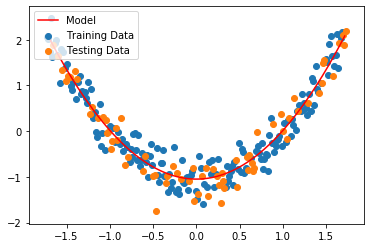

In [15]:
plotter = Plotter(
    polynomial_regression_k_2,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
)

plotter.scatter_data(dataset.min(column='x'), dataset.max(column='x'))

## Question6: Now, evaluate your models with the testing dataset and return the generalization error. Interpret the results

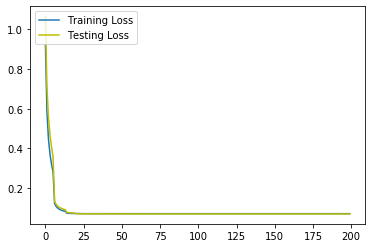

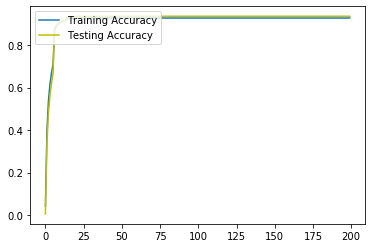

In [16]:
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

The model had fitted the data and the loss function had decreased over time.

## Question7: Is there any overfitting or underfitting? Otherwise, did your polynomial regression with the chosen degree k performed well? Develop your answer

There's neither an overfitting nor an underfitting, the 2nd order ploynomial had fitted the data perfectly.

As the loss shows the training error is not far behind and almost the same as the testing loss.

## Question8: Now, choose two other values of degree k, fit and evaluate your models.

### K = 3

In [17]:
# Reset Everything
training_inputs, testing_inputs, training_outputs, testing_outputs = dataset.split_data(testing_size=0.3)

polynomial_regression_k_3 = PolynomialRegression(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
    k_order=3
)
polynomial_regression_k_3.train(max_iterations=200, use_armijo=True)

In [18]:
training_loss, testing_loss = polynomial_regression_k_3.get_loss()
training_accuracy, testing_accuracy = polynomial_regression_k_3.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")

Training Accuracy: 0.9274311202987047, Training Loss: 0.07014979445483241
Testing Accuracy: 0.9343582269794541, Testing Loss: 0.07036534414224707



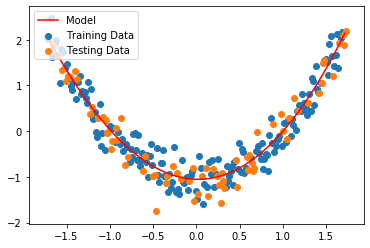

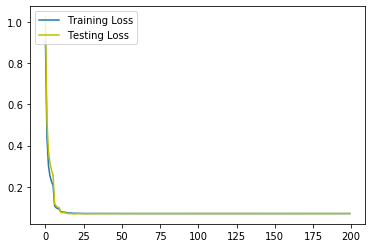

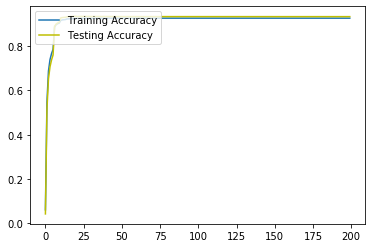

In [19]:
plotter = Plotter(
    polynomial_regression_k_3,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
)

plotter.scatter_data(dataset.min(column='x'), dataset.max(column='x'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

### K = 4

In [20]:
polynomial_regression_k_4 = PolynomialRegression(
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
    k_order=4
)
polynomial_regression_k_4.train(max_iterations=200, use_armijo=True)

In [21]:
training_loss, testing_loss = polynomial_regression_k_4.get_loss()
training_accuracy, testing_accuracy = polynomial_regression_k_4.get_accuracy()

print(f"""Training Accuracy: {training_accuracy}, Training Loss: {training_loss}
Testing Accuracy: {testing_accuracy}, Testing Loss: {testing_loss}
""")

Training Accuracy: 0.915621307433739, Training Loss: 0.0815659269407882
Testing Accuracy: 0.9003889415511318, Testing Loss: 0.10677905372748284



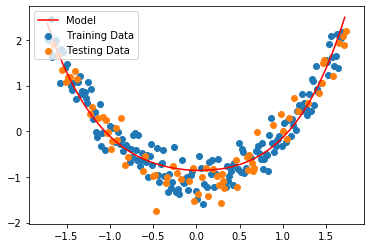

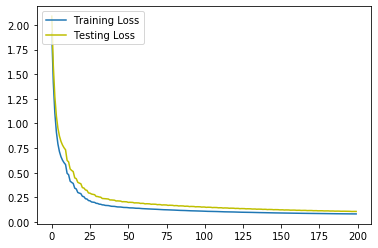

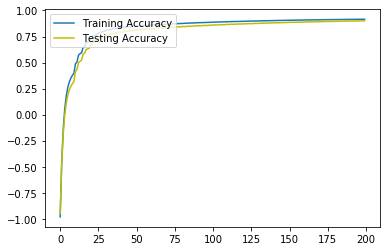

In [22]:
plotter = Plotter(
    polynomial_regression_k_4,
    training_inputs.copy(),
    training_outputs.copy(),
    testing_inputs.copy(),
    testing_outputs.copy(),
)

plotter.scatter_data(dataset.min(column='x'), dataset.max(column='x'))
plotter.plot_loss_evolution()
plotter.plot_accuracy_evolution()

## Question9: Compare between your models in term of evaluation metrics and number of iterations.

- For the model with k = 2 it had taken around 25 iterations to convege and an accuracy of 92% on training vs 94% on testing

- For the model with k = 3 it had taken also around 25 iterations and an accuracy of 92% on training vs 94% on testing%

- For the model with k = 4 it had tooken so long to converge with around 175 iterations to an accuracy of 90% on the training data vs 92% on testing.

### Question10: Estimate generalization error (bias-variance) and interpret results.

In [24]:
_, testing_loss = polynomial_regression_k_2.get_loss()

print(f"""Generalization error: {testing_loss}""")

Generalization error: 0.0693999062370477
